# Oscillation Investigation into NREL Design Loads

OpenFAST simulations are carried out as part of an ongoing research project into design loads. The well-known 5MW NREL reference turbine is used. For wind speeds above the cut-out threshold, very low frequencies for the flapwise moment were observed. This Notebook aims at investigating these. 

In [1]:
# Python includes

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

from os import path
from glob import glob

In [77]:
# exemplary data file lives under ../data/

# convert the header line (copied from the input data file) into a list of names
header_names_raw='Time        Wind1VelX   Wind1VelY   Wind1VelZ   RootMFlp1   RootMFlp2   RootMFlp3   RootMEdg1   RootMEdg2   RootMEdg3   LSSTipVxa   B1Pitch     B2Pitch     B3Pitch     RtSpeed     Wave1Elev   -ReactMXss  -ReactMYss'
header_names = [name for name in header_names_raw.split(' ') if len(name) != 0]

# convert the unit line (copied from the input data file) into a lift of units
header_units_raw='(s)         (m/s)       (m/s)       (m/s)       (kN-m)      (kN-m)      (kN-m)      (kN-m)      (kN-m)      (kN-m)      (rpm)       (deg)       (deg)       (deg)       (rpm)       (m)         (Nm)        (Nm)      '
header_units = [unit for unit in header_units_raw.split(' ') if len(unit) != 0]

header_names_pc39_raw = 'Time       Wind1VelX   Wind1VelY   Wind1VelZ   RootMFlp1   RootMFlp2   RootMFlp3   RootMEdg1   RootMEdg2   RootMEdg3   RtAeroFxh   RtAeroFyh   RtAeroFzh   RtAeroMxh   RtAeroMyh   RtAeroMzh   Wave1Elev   -ReactMXss  -ReactMYss'
header_names_pc39 = [name for name in header_names_pc39_raw.split(' ') if len(name) != 0]

# convert the unit line (copied from the input data file) into a lift of units
header_units_pc39_raw='(s)         (m/s)       (m/s)       (m/s)       (kN-m)      (kN-m)      (kN-m)      (kN-m)      (kN-m)      (kN-m)      (N)         (N)         (N)         (N-m)       (N-m)       (N-m)       (m)         (Nm)        (Nm)'
header_units_pc39 = [unit for unit in header_units_pc39_raw.split(' ') if len(unit) != 0]

# join both lists together to generate a list of names with units
header = [' '.join([name, unit]) for name, unit in zip(header_names, header_units)]
header_pc39 = [' '.join([name, unit]) for name, unit in zip(header_names_pc39, header_units_pc39)]
# definition of file paths (should work under windows as well)
file_name_glob = '*.out'
data_dir = '../../data/machine_influence-investigation/'
laptop_data_dir = path.join(data_dir, 'Laptop')
pc39_data_dir = path.join(data_dir, 'PC39')

# dict to store data in
laptop_timeseries = dict()
pc39_timeseries = dict()

In [85]:
for data_file in glob(path.join(laptop_data_dir, file_name_glob)):
    if not path.isfile(data_file):
        print('skipping {}'.format(data_file))
        continue
        
    print(data_file)
    
    # extract wind speed 
    seed_wind_speed = data_file.split('/')[-1].split('.')[0]
    
    # read in time series data file
    laptop_timeseries[seed_wind_speed] = pd.read_csv(data_file, 
                                         delimiter='\t', 
                                         skip_blank_lines=True, 
                                         skiprows=9, 
                                         names=header)
    # set time column as index
    laptop_timeseries[seed_wind_speed]['Time (s)'] = pd.to_timedelta(laptop_timeseries[seed_wind_speed]['Time (s)'],
                                                                     unit='S'
                                                                    )
    laptop_timeseries[seed_wind_speed].set_index('Time (s)', inplace=True)

../../data/machine_influence-investigation/Laptop/3_13.out
../../data/machine_influence-investigation/Laptop/2_15.out
../../data/machine_influence-investigation/Laptop/3_15.out
../../data/machine_influence-investigation/Laptop/6_13.out
../../data/machine_influence-investigation/Laptop/5_17.out
../../data/machine_influence-investigation/Laptop/4_21.out
../../data/machine_influence-investigation/Laptop/1_5.out


In [100]:
for data_file in glob(path.join(pc39_data_dir, file_name_glob)):
    if not path.isfile(data_file):
        print('skipping {}'.format(data_file))
        continue
        
    print(data_file)
    
    # extract wind speed 
    seed_wind_speed = data_file.split('/')[-1].split('.')[0]
    
    # read in time series data file
    pc39_timeseries[seed_wind_speed] = pd.read_csv(data_file, 
                                         delimiter='\t', 
                                         skip_blank_lines=True, 
                                         skiprows=9, 
                                         names=header_pc39)
    # set time column as index
    pc39_timeseries[seed_wind_speed]['Time (s)'] = pd.to_timedelta(pc39_timeseries[seed_wind_speed]['Time (s)'],
                                                                     unit='S'
                                                                    )
    pc39_timeseries[seed_wind_speed].set_index('Time (s)', inplace=True)


../../data/machine_influence-investigation/PC39/3_13.out
../../data/machine_influence-investigation/PC39/2_15.out
../../data/machine_influence-investigation/PC39/3_15.out
../../data/machine_influence-investigation/PC39/6_13.out
../../data/machine_influence-investigation/PC39/5_17.out
../../data/machine_influence-investigation/PC39/4_21.out
../../data/machine_influence-investigation/PC39/1_5.out


In [86]:
laptop_timeseries['3_13']

,Wind1VelX (m/s),Wind1VelY (m/s),Wind1VelZ (m/s),RootMFlp1 (kN-m),RootMFlp2 (kN-m),RootMFlp3 (kN-m),RootMEdg1 (kN-m),RootMEdg2 (kN-m),RootMEdg3 (kN-m),LSSTipVxa (rpm),B1Pitch (deg),B2Pitch (deg),B3Pitch (deg),RtSpeed (rpm),Wave1Elev (m),-ReactMXss (Nm),-ReactMYss (Nm)
Time (s),,,,,,,,,,,,,,,,,
0 days 00:00:00.012500,10.28,-1.9630,1.034,6507.0,7631.0,7580.0,-339.2,514.90,-1818.0,5.996,5.996,5.996,12.22,0.0,12520.0,-4239000.0,NaN
0 days 00:00:00.025000,10.37,-2.1970,1.078,7829.0,6925.0,6916.0,-615.7,51.97,-698.3,5.985,5.985,5.985,12.32,0.0,-72850.0,-27750000.0,NaN
0 days 00:00:00.037500,10.46,-2.4320,1.122,8158.0,6664.0,6749.0,-588.5,63.77,-228.2,5.968,5.968,5.968,12.39,0.0,-201600.0,-25510000.0,NaN
0 days 00:00:00.050000,10.55,-2.6660,1.166,7323.0,7051.0,7138.0,-121.8,666.20,-715.7,5.947,5.947,5.947,12.44,0.0,-149200.0,9351000.0,NaN
0 days 00:00:00.062500,10.59,-2.7130,1.118,6472.0,7516.0,7509.0,403.9,1357.00,-1328.0,5.922,5.922,5.922,12.45,0.0,295500.0,47950000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:59:59.950000,11.96,-0.7819,-1.838,8201.0,10090.0,9448.0,453.6,-2031.00,4325.0,2.870,2.870,2.870,12.13,0.0,9246000.0,78290000.0,NaN
0 days 00:59:59.962500,12.05,-1.0330,-1.736,8242.0,10130.0,9470.0,393.4,-2014.00,4356.0,2.880,2.880,2.880,12.14,0.0,9252000.0,78210000.0,NaN
0 days 00:59:59.975000,12.15,-1.2850,-1.634,8301.0,10160.0,9488.0,337.1,-1997.00,4382.0,2.891,2.891,2.891,12.14,0.0,9201000.0,78090000.0,NaN


<IPython.core.display.Javascript object>


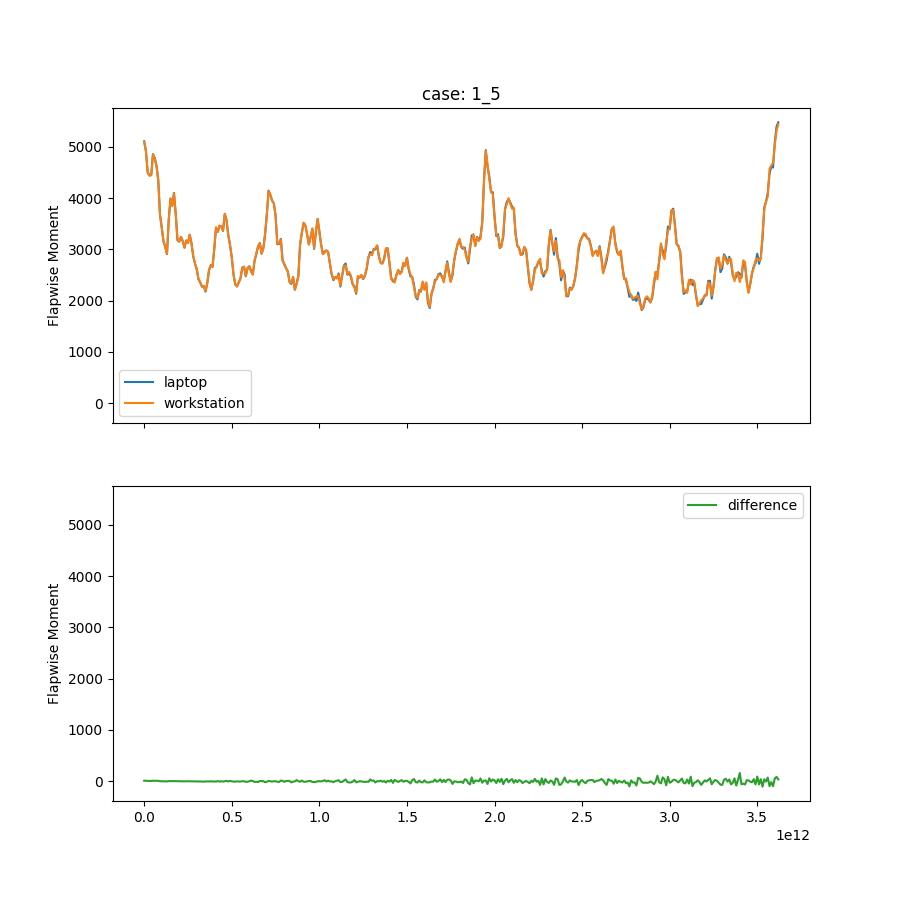

<IPython.core.display.Javascript object>


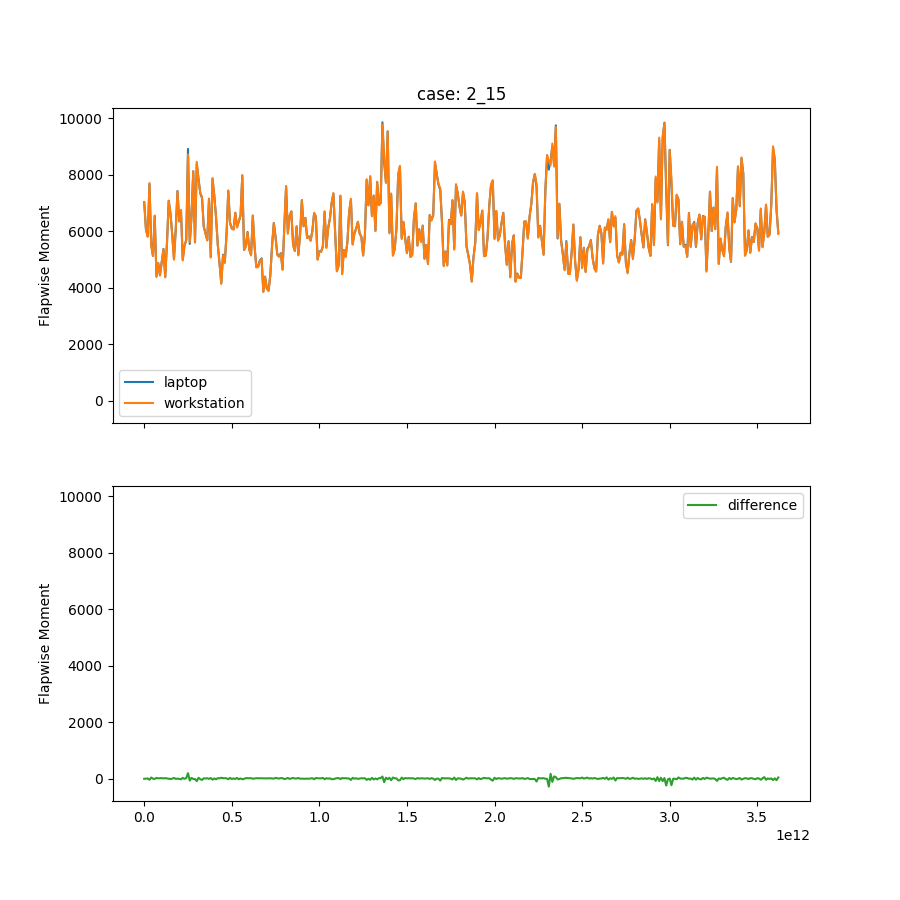

<IPython.core.display.Javascript object>


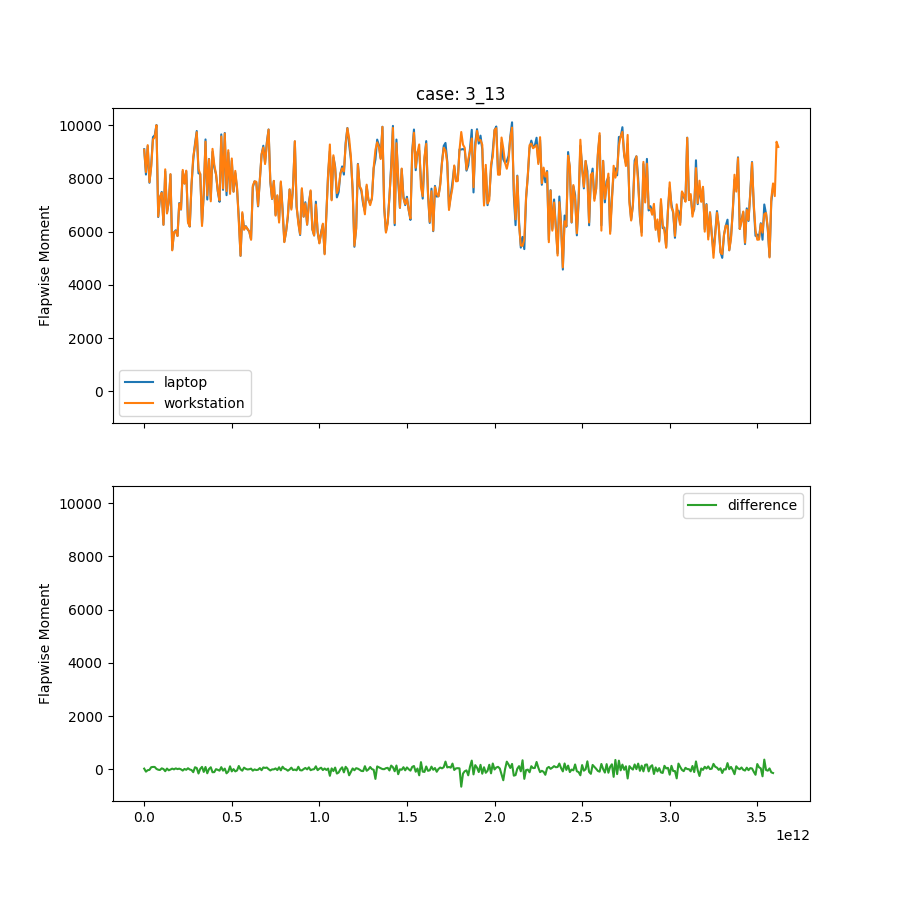

<IPython.core.display.Javascript object>


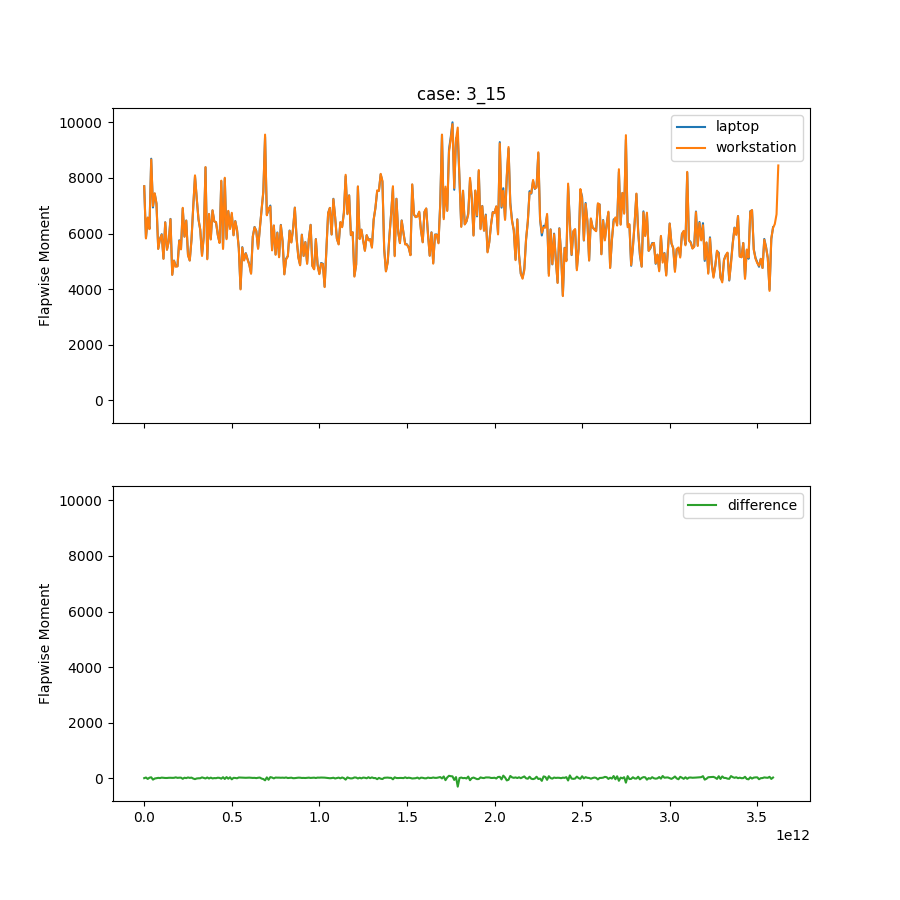

<IPython.core.display.Javascript object>


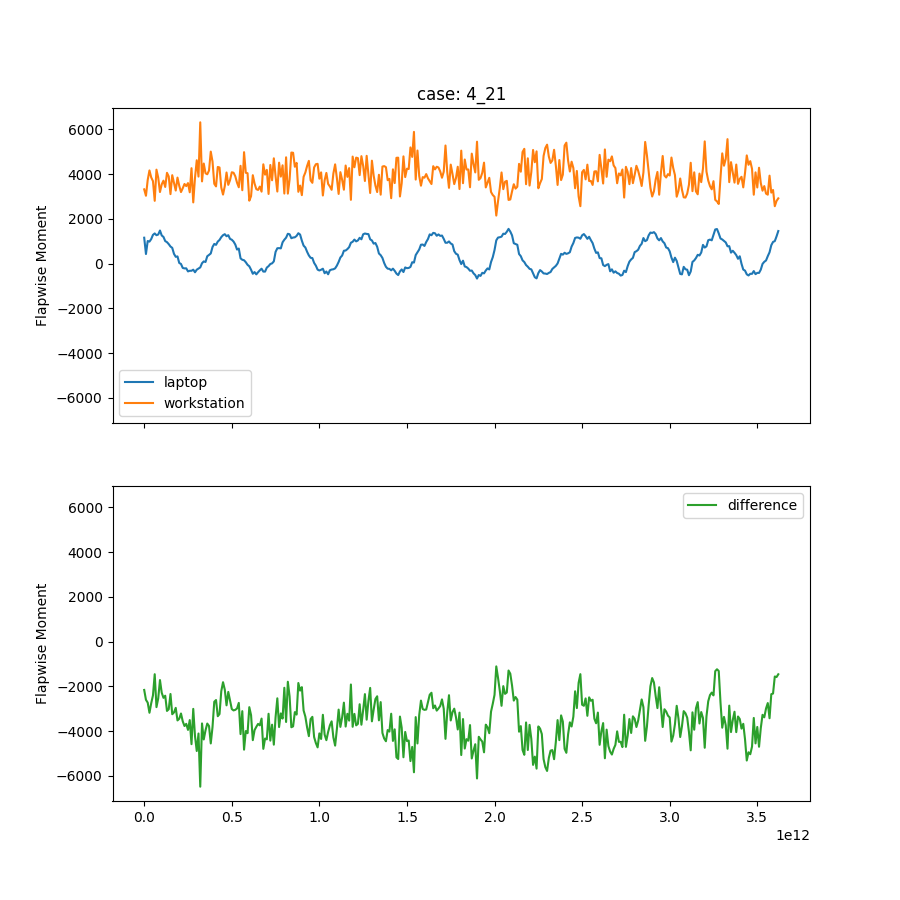

<IPython.core.display.Javascript object>


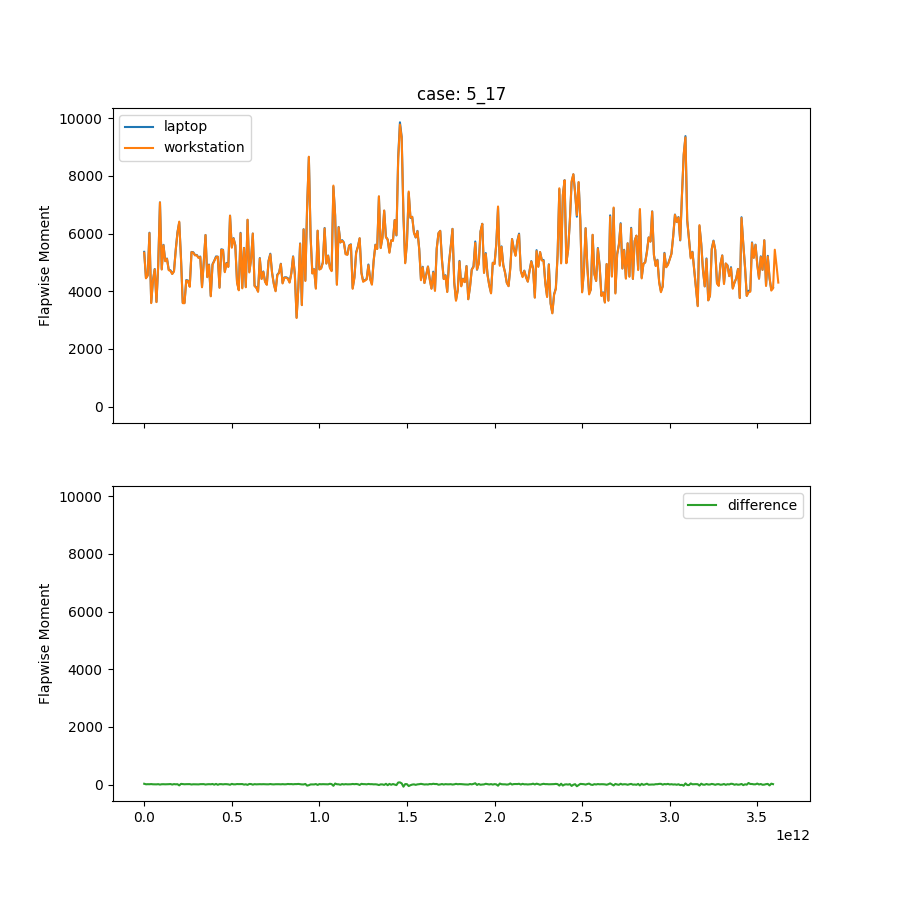

<IPython.core.display.Javascript object>


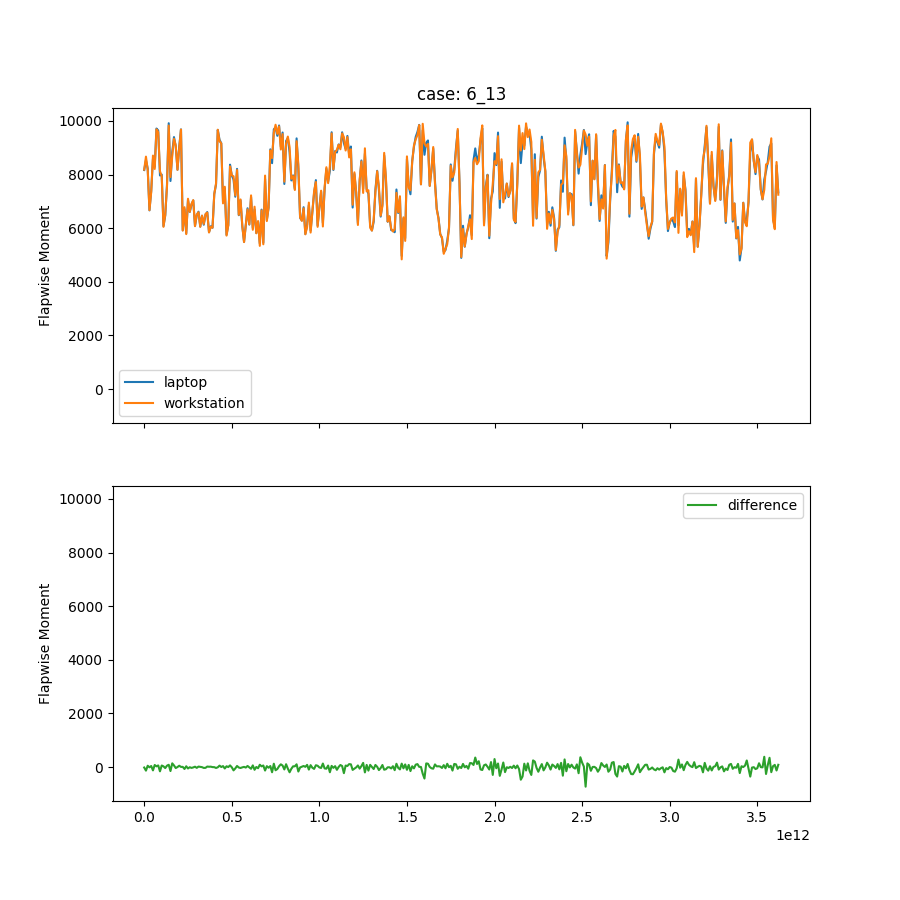

In [101]:
for seed_wind_speed in sorted(laptop_timeseries):
    fig, ax = plt.subplots(figsize=(9,9),
                         nrows = 2,
                         sharex = True,
                         sharey = True,
                        )
    ax[0].set_title('case: {}'.format(seed_wind_speed))
    
    ax[0].plot(laptop_timeseries[seed_wind_speed]['RootMFlp1 (kN-m)'].resample('10s').mean(), label='laptop')
    ax[0].plot(pc39_timeseries[seed_wind_speed]['RootMFlp1 (kN-m)'].resample('10s').mean(), label='workstation')
    ax[1].plot(laptop_timeseries[seed_wind_speed]['RootMFlp1 (kN-m)'].resample('10s').mean() -
               pc39_timeseries[seed_wind_speed]['RootMFlp1 (kN-m)'].resample('10s').mean(),
               label='difference',
               color='tab:green'
              )
    ax[0].legend()
    ax[1].legend()
    
    ax[0].set_ylabel('Flapwise Moment')
    ax[1].set_ylabel('Flapwise Moment')
    
    fig.savefig('case_{}'.format(seed_wind_speed), dpi=150)
    

## Rotor speeds for all available time series

<IPython.core.display.Javascript object>


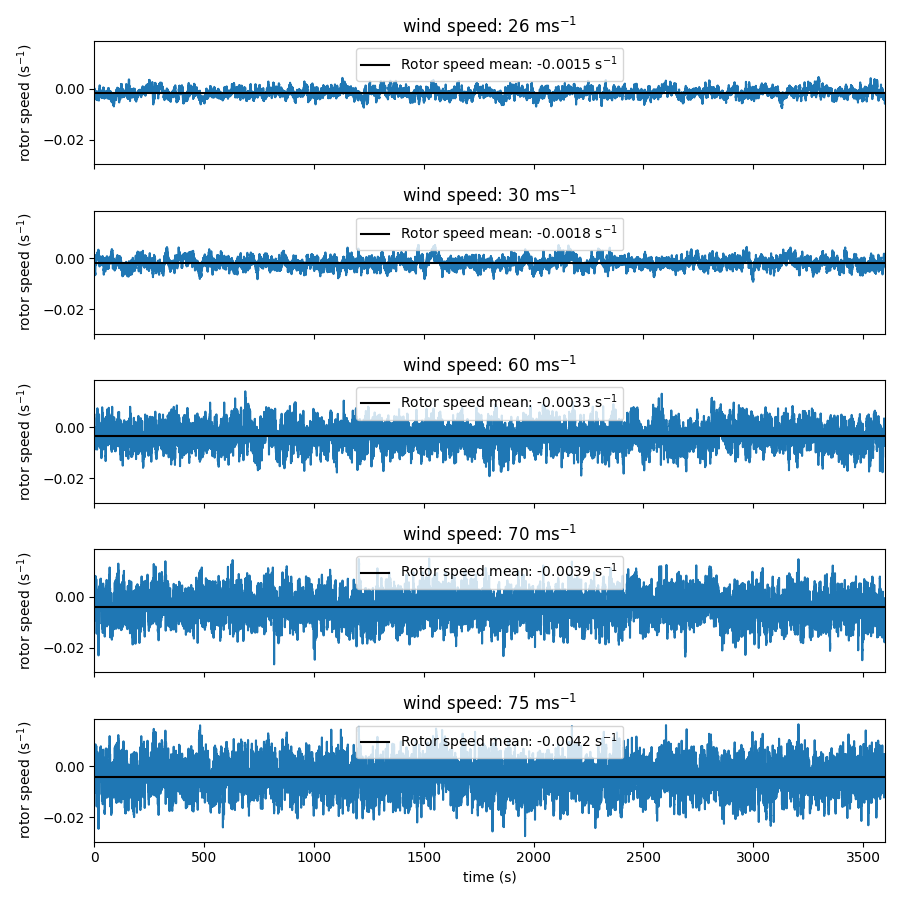

In [39]:
fig, ax = plt.subplots(figsize=(9,9),
                       nrows=len(timeseries.keys()),
                       sharex=True,
                       sharey=True
                      )
for i, ts in enumerate(sorted(timeseries)):
    rotor_speed_mean = timeseries[ts]['RtSpeed (Hz)'].mean()
    ax[i].plot(timeseries[ts]['RtSpeed (Hz)'])
    ax[i].axhline(y=rotor_speed_mean, 
                  label='Rotor speed mean: {:1.4f}'.format(rotor_speed_mean) + ' s$^{-1}$',
                  color='k'
                 )
    ax[i].set_ylabel('rotor speed (s$^{-1}$)')
    ax[i].legend(ncol=2, loc='upper center')
    ax[i].set_title('wind speed: {}'.format(ts) + ' ms$^{-1}$')
    ax[i].set_xlim([0, 3600])
    
ax[i].set_xlabel('time (s)')
fig.tight_layout()
fig.savefig('rotor_speeds.png', dpi=150)

<IPython.core.display.Javascript object>


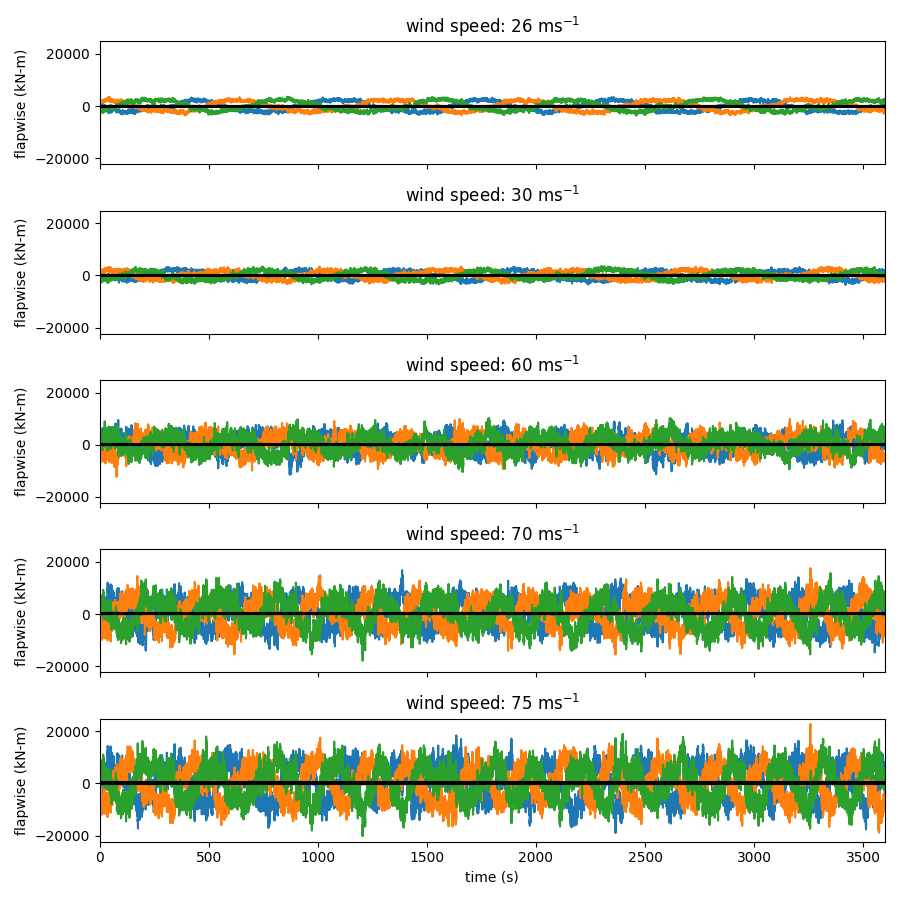

In [45]:
fig, ax = plt.subplots(figsize=(9,9),
                       nrows=len(timeseries.keys()),
                       sharex=True,
                       sharey=True
                      )
for i, ts in enumerate(sorted(timeseries)):
    flapwise_mean_blade_1 = timeseries[ts]['RootMFlp1 (kN-m)'].mean()
    flapwise_mean_blade_2 = timeseries[ts]['RootMFlp2 (kN-m)'].mean()
    flapwise_mean_blade_3 = timeseries[ts]['RootMFlp3 (kN-m)'].mean()
    
    ax[i].plot(timeseries[ts]['RootMFlp1 (kN-m)'])
    ax[i].plot(timeseries[ts]['RootMFlp2 (kN-m)'])
    ax[i].plot(timeseries[ts]['RootMFlp3 (kN-m)'])
    
    ax[i].axhline(y=flapwise_mean_blade_1, 
                  label='mean flapwise b1: {:1.2f}'.format(flapwise_mean_blade_1) + ' kN-m',
                  color='k'
                 )
    ax[i].axhline(y=flapwise_mean_blade_2, 
                  label='mean flapwise b2: {:1.2f}'.format(flapwise_mean_blade_2) + ' kN-m',
                  color='k'
                 )
    ax[i].axhline(y=flapwise_mean_blade_3, 
                  label='mean flapwise b3: {:1.2f}'.format(flapwise_mean_blade_3) + ' kN-m',
                  color='k'
                 )
    ax[i].set_ylabel('flapwise (kN-m)')
    #ax[i].legend(ncol=3, loc='upper center')
    ax[i].set_title('wind speed: {}'.format(ts) + ' ms$^{-1}$')
    ax[i].set_xlim([0, 3600])
    
ax[i].set_xlabel('time (s)')
fig.tight_layout()
fig.savefig('flapwise_timeseries.png', dpi=150)

All three flapwise moments show a very low frequency component where the magnitude of the moment is both symmetrical (~ -3 MNm to 3 MNm) and has an approximate phase shift of 120 DEG. 

Additionally all three moments depict higher frequency fluctuations

## FFT of flapwise moments as well as Rotor Speed and Wind Speed (mag)

<IPython.core.display.Javascript object>


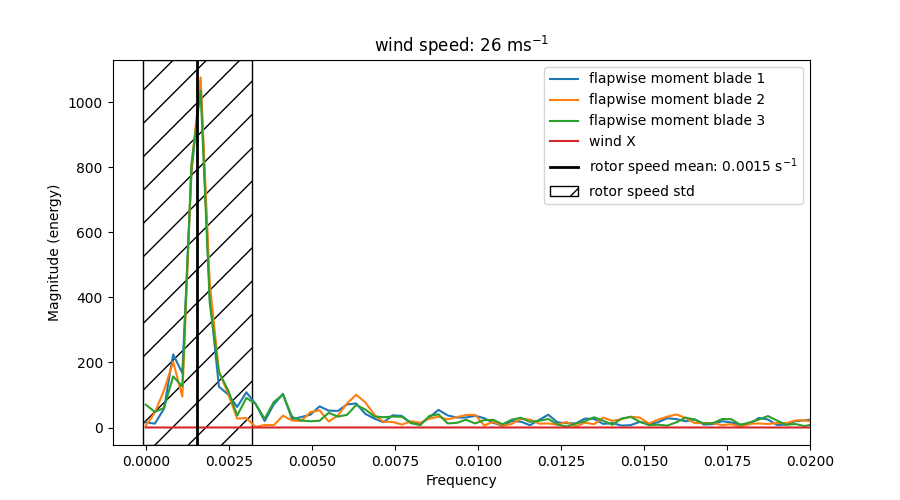

<IPython.core.display.Javascript object>


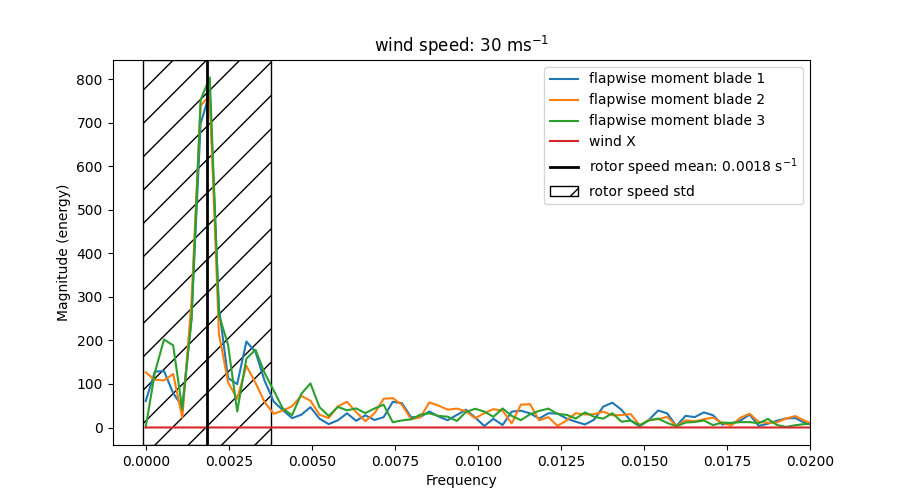

<IPython.core.display.Javascript object>


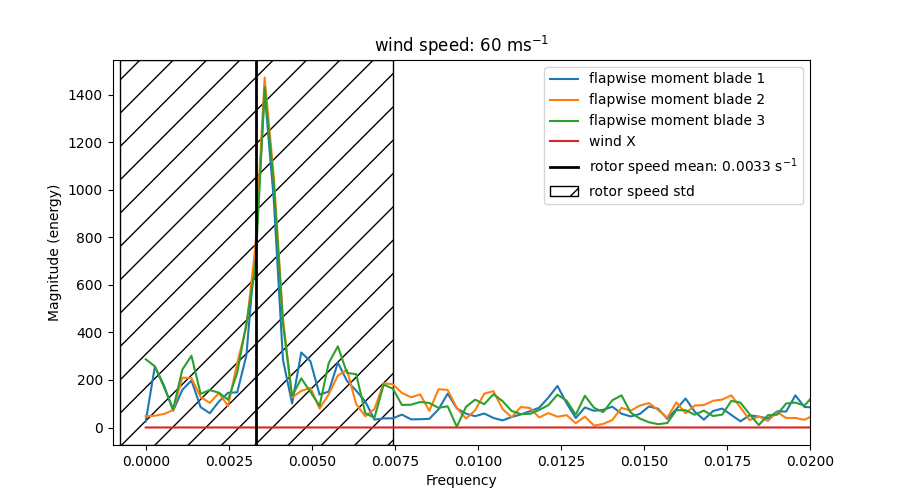

<IPython.core.display.Javascript object>


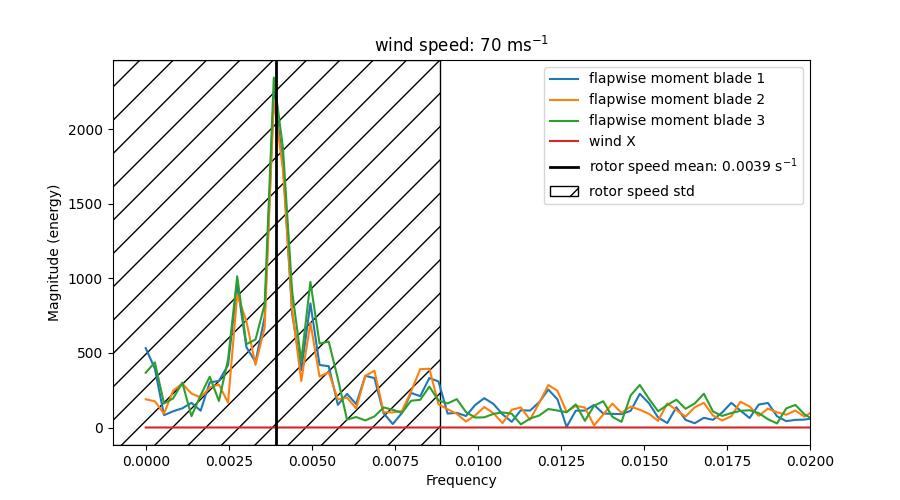

<IPython.core.display.Javascript object>


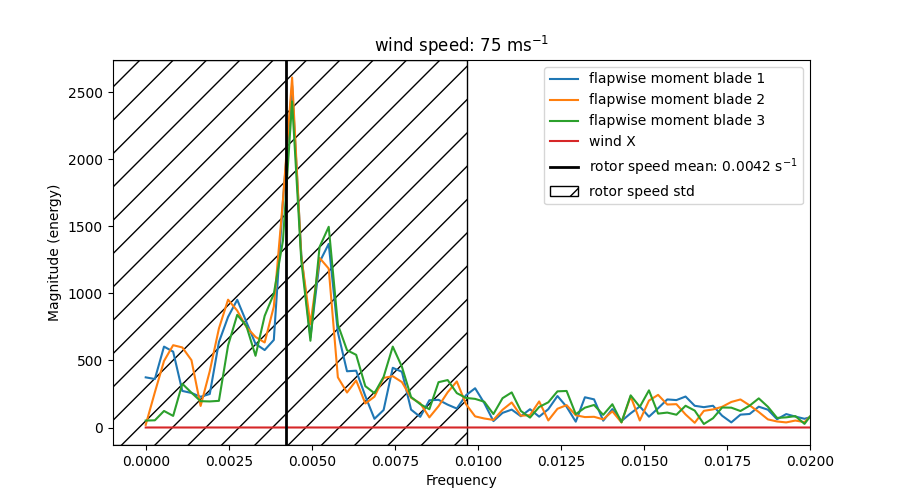

In [54]:
for ts in sorted(timeseries):
    deltaT = timeseries[ts].index[1] - timeseries[ts].index[0] # -> gives the deltaT needed to calculate the fourier frequencies
    Fs = 1/deltaT
    
    plt.figure(figsize=(9,5))

    # magnitude spectrum of the flapwise moments
    plt.magnitude_spectrum(timeseries[ts]['RootMFlp1 (kN-m)'], Fs=Fs, scale='linear', label='flapwise moment blade 1')
    plt.magnitude_spectrum(timeseries[ts]['RootMFlp2 (kN-m)'], Fs=Fs, scale='linear', label='flapwise moment blade 2')
    plt.magnitude_spectrum(timeseries[ts]['RootMFlp3 (kN-m)'], Fs=Fs, scale='linear', label='flapwise moment blade 3')

    # Wind1VelX   Wind1VelY   Wind1VelZ

    # magnitude spectrum of the wind in x direction
    plt.magnitude_spectrum(timeseries[ts]['Wind1VelZ (m/s)'] - timeseries[ts]['Wind1VelZ (m/s)'].mean(), Fs=Fs, scale='linear', label='wind X')

    # magnitude spectrum of rotor speed

    # plt.magnitude_spectrum(timeseries[ts]['RtSpeed (Hz)'] - timeseries[ts]['RtSpeed (Hz)'].mean(), Fs=Fs, scale='dB', label='Rotor speed')

    RtSpeedMean = abs(timeseries[ts]['RtSpeed (Hz)'].mean())
    RtSpeedStd = timeseries[ts]['RtSpeed (Hz)'].std()

    plt.axvline(x=RtSpeedMean, linewidth=2, label='rotor speed mean: {:1.4f}'.format(RtSpeedMean) + ' s$^{-1}$', color='k')
    plt.axvspan(xmin=RtSpeedMean - RtSpeedStd, 
                xmax=RtSpeedMean + RtSpeedStd, 
                hatch='/', 
                facecolor='white', 
                edgecolor='k',
                label='rotor speed std')

    plt.xlim([-0.001, 0.02])
    plt.legend()
    plt.title('wind speed: {}'.format(ts)+' ms$^{-1}$')
    plt.savefig('spectrum_detail_{}.png'.format(ts), dpi=150)

<IPython.core.display.Javascript object>


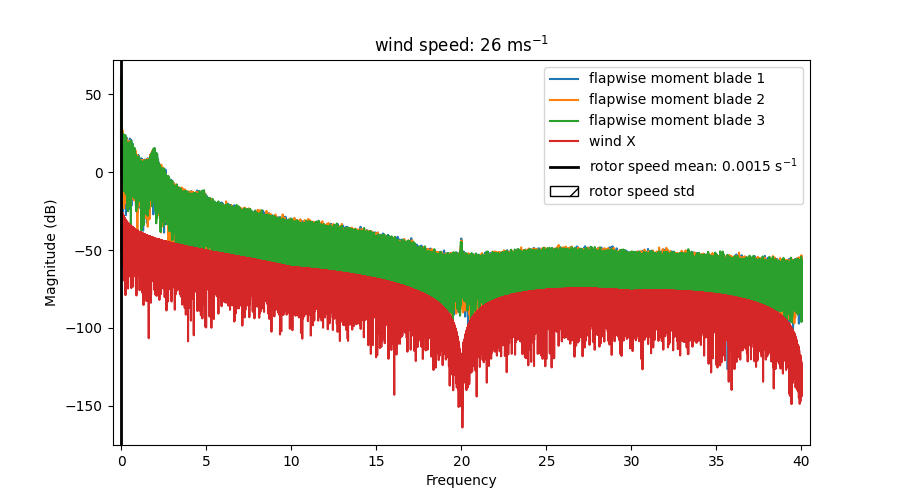

<IPython.core.display.Javascript object>


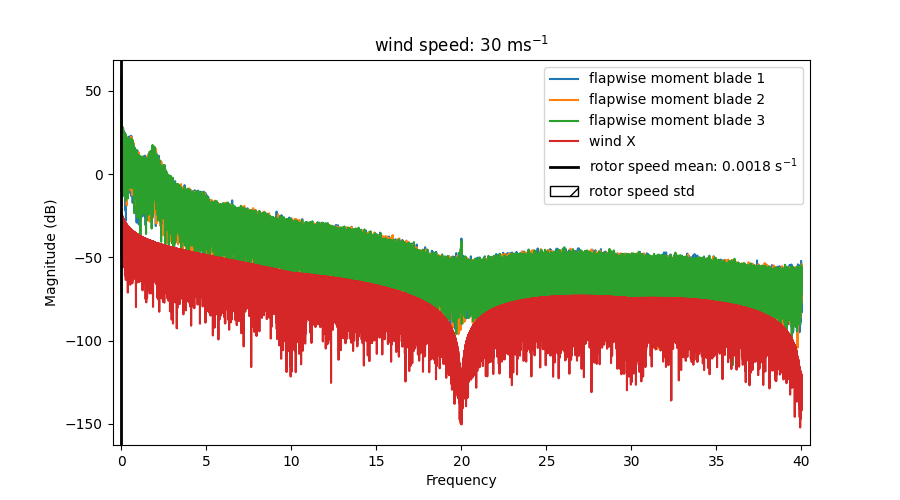

<IPython.core.display.Javascript object>


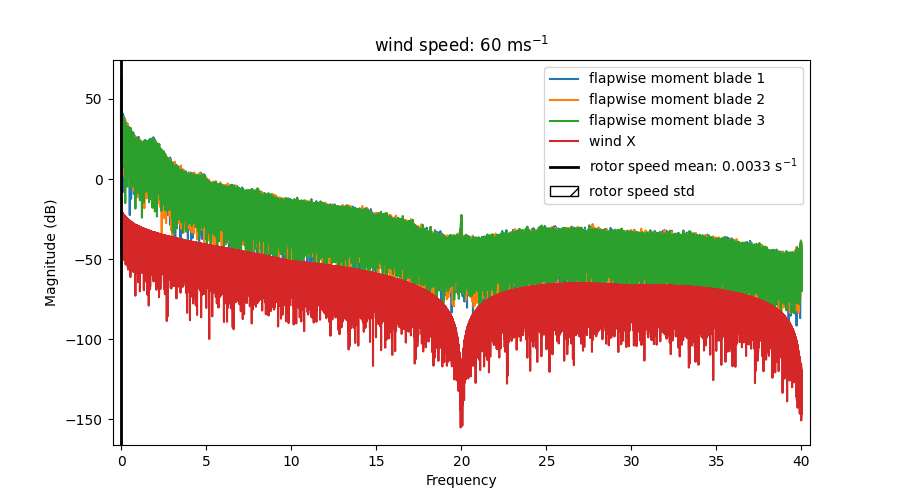

<IPython.core.display.Javascript object>


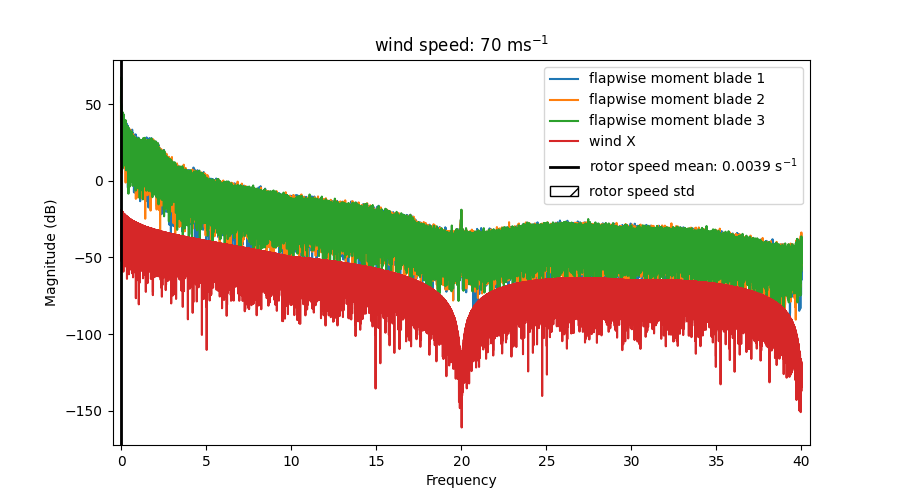

<IPython.core.display.Javascript object>


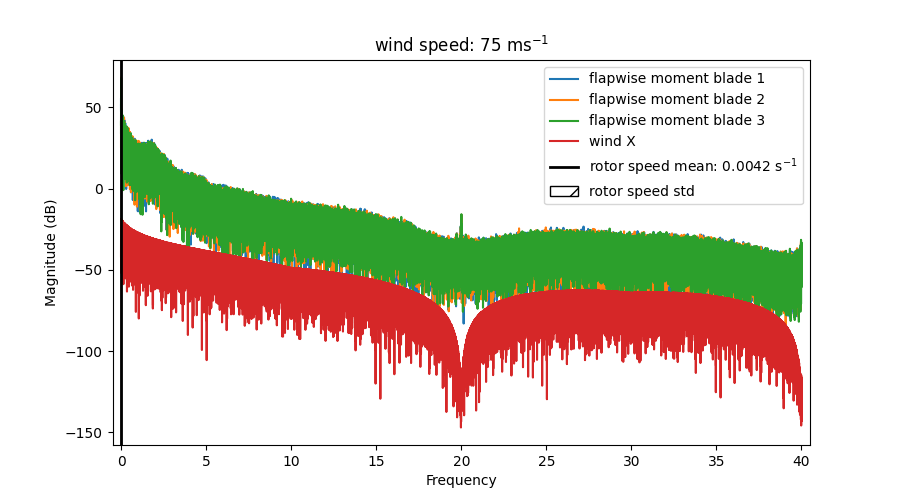

In [53]:
for ts in sorted(timeseries):
    deltaT = timeseries[ts].index[1] - timeseries[ts].index[0] # -> gives the deltaT needed to calculate the fourier frequencies
    Fs = 1/deltaT
    
    plt.figure(figsize=(9,5))

    # magnitude spectrum of the flapwise moments
    plt.magnitude_spectrum(timeseries[ts]['RootMFlp1 (kN-m)'], Fs=Fs, scale='dB', label='flapwise moment blade 1')
    plt.magnitude_spectrum(timeseries[ts]['RootMFlp2 (kN-m)'], Fs=Fs, scale='dB', label='flapwise moment blade 2')
    plt.magnitude_spectrum(timeseries[ts]['RootMFlp3 (kN-m)'], Fs=Fs, scale='dB', label='flapwise moment blade 3')

    # Wind1VelX   Wind1VelY   Wind1VelZ

    # magnitude spectrum of the wind in x direction
    plt.magnitude_spectrum(timeseries[ts]['Wind1VelZ (m/s)'] - timeseries[ts]['Wind1VelZ (m/s)'].mean(), Fs=Fs, scale='dB', label='wind X')

    # magnitude spectrum of rotor speed

    # plt.magnitude_spectrum(timeseries[ts]['RtSpeed (Hz)'] - timeseries[ts]['RtSpeed (Hz)'].mean(), Fs=Fs, scale='dB', label='Rotor speed')

    RtSpeedMean = abs(timeseries[ts]['RtSpeed (Hz)'].mean())
    RtSpeedStd = timeseries[ts]['RtSpeed (Hz)'].std()

    plt.axvline(x=RtSpeedMean, linewidth=2, label='rotor speed mean: {:1.4f}'.format(RtSpeedMean) + ' s$^{-1}$', color='k')
    plt.axvspan(xmin=RtSpeedMean - RtSpeedStd, 
                xmax=RtSpeedMean + RtSpeedStd, 
                hatch='/', 
                facecolor='white', 
                edgecolor='k',
                label='rotor speed std')

    plt.xlim([-0.5, 40.5])
    plt.legend()
    plt.title('wind speed: {}'.format(ts)+' ms$^{-1}$')
    plt.savefig('spectrum_overview_{}.png'.format(ts), dpi=150)